In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nixio as nix
import quantities as pq
import neo

In [2]:
px = pq.UnitQuantity('px', pq.dimensionless, symbol='px')
fps = pq.UnitQuantity('fps', pq.Hz, symbol='fps')

path_nix = '../data/nix_files/'
filename = 'subj_01_day_3_r_epo.nix'
with neo.io.NixIO(path_nix + filename, 'ro') as io:
    nix_data = io.read_block()

In [3]:
duration = []
for i in range(len(nix_data.segments)):
    reach_duration = nix_data.segments[i].annotations['reach_duration']
    reach_duration = pd.to_timedelta(reach_duration, unit='s').total_seconds()
    duration.append(reach_duration)

magnitude = []
for i in range(len(nix_data.segments)):
    reach_r = nix_data.segments[i].annotations['reach_r']
    magnitude.append(reach_r)

angle = []
for i in range(len(nix_data.segments)):
    reach_a = -nix_data.segments[i].annotations['reach_a']
    reach_a = np.where(reach_a <= 90, reach_a, 180 - reach_a)
    reach_a = np.where(reach_a >= -90, reach_a, -180 - reach_a)
    angle.append(reach_a)

speed = []
for i in range(len(nix_data.segments)):
    onset_speed = nix_data.segments[i].annotations['onset_velocity']*nix_data.segments[1].analogsignals[1].sampling_rate
    speed.append(onset_speed)

speech = []
for i in range(len(nix_data.segments)):
    audio_ratio = nix_data.segments[i].annotations['audio_ratio']
    speech.append(audio_ratio)

bimanual_ratio = []
for i in range(len(nix_data.segments)):
    I_over_C_ratio = nix_data.segments[i].annotations['I_over_C_ratio']
    bimanual_ratio.append(I_over_C_ratio)

bimanual_over = []
for i in range(len(nix_data.segments)):
    other_reach_overlap = nix_data.segments[i].annotations['other_reach_overlap']
    bimanual_over.append(other_reach_overlap)

bimanual = []
for i in range(len(nix_data.segments)):
    bimanual_class = nix_data.segments[i].annotations['bimanual']
    bimanual.append(bimanual_class)


    

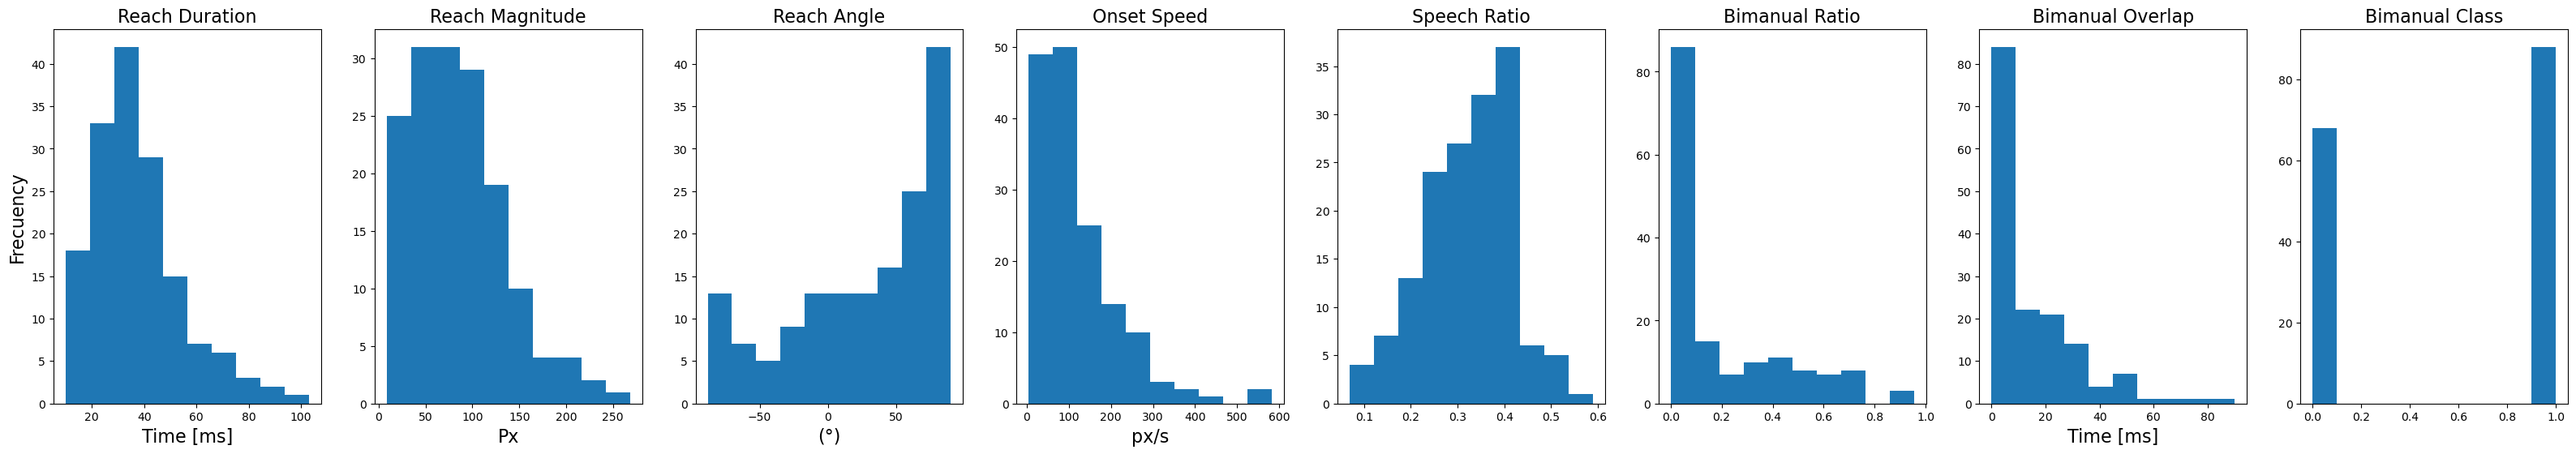

In [4]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1, 8, figsize=(40, 6))

ax1.hist(duration);
ax1.set_xlabel('Time [ms]',fontsize=16);
ax1.set_ylabel('Frecuency',fontsize=16);
ax1.set_title('Reach Duration',fontsize=16);

ax2.hist(magnitude);
ax2.set_xlabel('Px',fontsize=16);
ax2.set_title('Reach Magnitude',fontsize=16);

ax3.hist(angle);
ax3.set_xlabel('(°)',fontsize=16);
ax3.set_title('Reach Angle',fontsize=16);

ax4.hist(speed);
ax4.set_xlabel('px/s',fontsize=16);
ax4.set_title('Onset Speed',fontsize=16);

ax5.hist(speech);
ax5.set_title('Speech Ratio',fontsize=16);

ax6.hist(bimanual_ratio);
ax6.set_title('Bimanual Ratio',fontsize=16);

ax7.hist(bimanual_over);
ax7.set_title('Bimanual Overlap',fontsize=16);
ax7.set_xlabel('Time [ms]',fontsize=16);

ax8.hist(bimanual);
ax8.set_title('Bimanual Class',fontsize=16);